In [25]:
#--- load required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

#--- load data
ing_mat = loadmat('MATLAB/ingredients.mat')['ingredients']
cityDist_mat = loadmat('MATLAB/citiesDistMat.mat')['citiesDistMat']
labelName_mat = loadmat('MATLAB/labelNames.mat')['labelNames']
labels_mat = loadmat('MATLAB/labels.mat')['labels']
recipe_mat = loadmat('MATLAB/recipes.mat')['recipes']

#--- for colnames
ing_headline = []
for i in ing_mat[0]:
    ing_headline.append(i[0])
#--- create data matrices
dataset_X = pd.DataFrame(recipe_mat,columns=ing_headline) #predictors
dataset_y = pd.DataFrame(labels_mat,columns=['label']) #labels
X_train_full,X_test,y_train_full,y_test = train_test_split(dataset_X,dataset_y,test_size=0.2) #train test split
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,test_size=0.25) #train val split
X_train_len = len(X_train)

#--- additionally have cuisines as list
cuisines = []
for n in range(0, 12, 1):
    idx = dataset_y.index[dataset_y.label == n+1]
    cuisines.append(labelName_mat[idx[0]][0].item())

In [5]:
"""
    There are 709 ingredients which are used in 12 different cuisines 
    for 4236 recipes.  
    * label_mat: Number indicating the cuisine a recipe belongs to
    * labelName_mat: same as above just with names instead of numbers
    * recipe_mat: indicates which ingredients were used for a particular recipe
    * cityDist_mat: how far countries are away from each other distance-wise
"""

'\n    There are 709 ingredients which are used in 12 different cuisines \n    for 4236 recipes.  \n    * label_mat: Number indicating the cuisine a recipe belongs to\n    * labelName_mat: same as above just with names instead of numbers\n    * recipe_mat: indicates which ingredients were used for a particular recipe\n    * cityDist_mat: how far countries are away from each other distance-wise\n'

In [6]:
#--- how to get index of rows corresponding to one cuisine
dataset_y.index[dataset_y.label == 1]

# using this quite often, could have just created a list
# with the correspinding indices, will leave it like it is for now

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            343, 344, 345, 346, 347, 348, 349, 350, 351, 352],
           dtype='int64', length=353)

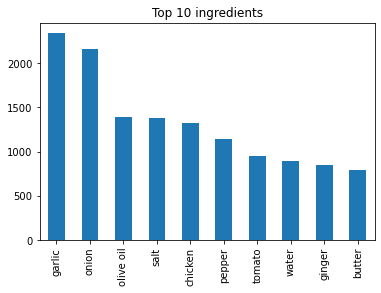

In [7]:
#--- top 10 most used ingredients
fig, ax = plt.subplots()
# sum up occurences of each ingredient
freq_ing = dataset_X.sum()
# filter for the 10 most frequent
most_freq_ing = freq_ing.nlargest(10)
ax.set_title("Top 10 ingredients")
most_freq_ing.plot.bar()

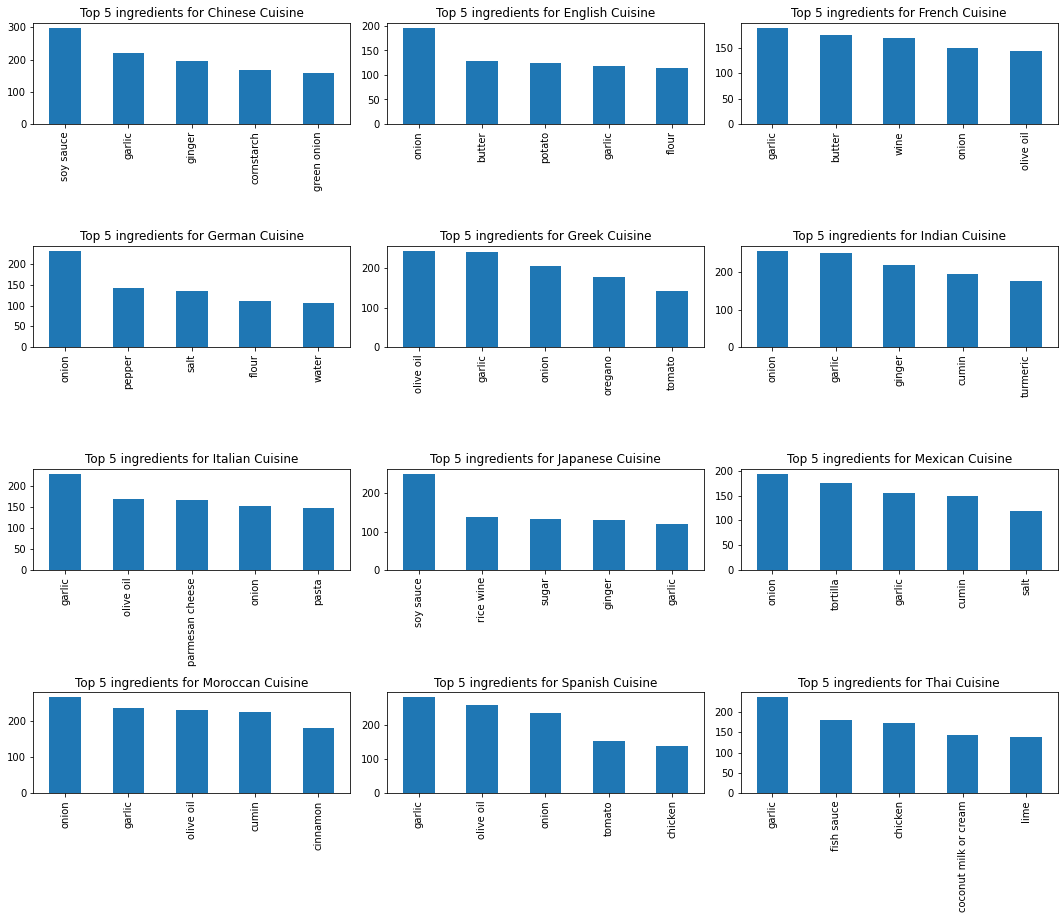

In [8]:
#--- top 3 ingredient per cuisine
#--- could still change colors, like same color for same ingredients
n_ing = 5

fig, axes = plt.subplots(4,3, figsize=(15,12))
n = 0
for i in range(0,4,1):
    for j in range(0,3,1):
        idx = dataset_y.index[dataset_y.label == n+1]
        freq_ing_cuis = dataset_X.iloc[idx].sum()
        most_freq_ing_cuis = freq_ing_cuis.nlargest(n_ing)
        fig.tight_layout()
        most_freq_ing_cuis.plot.bar(title = "Top {} ingredients for {} Cuisine".format(n_ing, labelName_mat[idx[0]][0].item()), 
                                    ax=axes[i,j])
        n+=1
        

In [9]:
#--- number of ingredients that each cuisine makes use of (in total)
used_ing = []
for n in range(0, 12, 1):
    idx = dataset_y.index[dataset_y.label == n+1]
    freq_ing_cuis = dataset_X.iloc[idx].sum()
    used_idx = freq_ing_cuis.index[freq_ing_cuis != 0]
    used_ing.append(len(used_idx))

data_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
                    "#Used ingredients": used_ing})

data_ing.sort_values(by="#Used ingredients", ascending=False)


,Cuisine,#Used ingredients
1,English,317
2,French,292
7,Japanese,286
10,Spanish,277
3,German,263
4,Greek,260
11,Thai,260
9,Moroccan,254
8,Mexican,250
6,Italian,249


In [10]:
#--- Average number of ingredients for each cuisine per recipe
av_num_ing = []
for i in range(0, 12, 1):
    idx = dataset_y.index[dataset_y.label == i+1]
    # row-wise sum of ingredients
    sum_ing = dataset_X.iloc[idx].sum(axis=1)
    av_num_ing.append(sum_ing.mean())

data_av_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
                    "Average no. of ingredients": av_num_ing})

data_av_ing.sort_values(by="Average no. of ingredients", ascending=False)

,Cuisine,Average no. of ingredients
9,Moroccan,13.189802
5,Indian,12.832861
11,Thai,11.674221
0,Chinese,11.413598
10,Spanish,11.263456
4,Greek,10.773371
2,French,10.495751
6,Italian,10.373938
8,Mexican,10.232295
3,German,9.532578


In [11]:
#--- too big correlation matrix
#dataset_X.corr()
#sns.pairplot(dataset_X)

In [12]:
#--- from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(dataset_X))

Top Absolute Correlations
cheshire cheese          english muffin    1.000000
sazon goya               sofrito sauce     0.816400
almond butter            coconut oil       0.707023
burdock root             kamaboko          0.707023
french style green bean  gumbo             0.707023
Chinese mushroom         sea cucumber      0.707023
coconut milk or cream    curry paste       0.580458
coriander root           satay             0.577214
rutabaga                 yams              0.577214
muscovado sugar          passata           0.577214
dtype: float64


In [13]:
#--- how many recipes of each cuisine?
num_recipes_cuis = []

for i in range(0, 12, 1):
    #print(dataset_y[dataset_y.label == i+1])
    num_recipes_cuis.append(len(dataset_y[dataset_y.label == i+1]))
    
print(num_recipes_cuis)


[353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353]


In [14]:
#--- everything looking good, nicely balanced data set, 
#--- no weird labels either:
dataset_y.label.isin(range(1, 13, 1)).all()

True

In [15]:
#--- balance in training set not perfect anymore but sufficiently good
num_recipes_cuis = []

for i in range(0, 12, 1):
    #print(dataset_y[dataset_y.label == i+1])
    num_recipes_cuis.append(len(y_train[y_train.label == i+1]))
    
print(num_recipes_cuis)

[206, 213, 197, 199, 216, 216, 209, 200, 214, 220, 217, 234]


In [16]:
#--- something else that would be interesting:
# Are there any ingredients that can be reduced to another ingredient such as 

In [72]:
""" 
Repeating most of the above but only using training set (and validation set?)

Just as a reminder, in our complete data we have 4236 recipes.
The way we splitted the recipes gives us 
        * 2541 == 60% training data
        * 847 == 20% validation data
        * 848 == 20% test data
"""

' \nRepeating most of the above but only using training set (and validation set?)\n\nJust as a reminder, in our complete data we have 4236 recipes.\nThe way we splitted the recipes gives us \n        * 2541 == 60% training data\n        * 847 == 20% validation data\n        * 848 == 20% test data\n'

In [ ]:
"""
Finally, starting with actual classification. We'll consider
        * Logistic Regression
        * Naive Bayes

Not that our design matrix is of the form (n_samples x d_features)

Note: # try using svc's

"""

In [73]:
def plot_confusion_matrix(cm, class_labels=None):
    """Plots a confusion matrix using seaborn's heatmap function
    
    Columns and rows are labelled with the strings provided in class_labels.
    
    Parameters
    ----------
    cm: array-like
        contains the confusion matrix
        
    class_labels: array-like, optional
        contains the string labels
            
    """
    
    # check whether we have count data or not
    if issubclass(cm.dtype.type, np.integer):
        fmt = 'd'
    else:
        fmt = '.2f'
    
    # Your code goes here
    
    if class_labels is not None:
        sns.heatmap(cm, cmap='viridis',xticklabels=class_labels, yticklabels=class_labels,\
                    annot=True, annot_kws={"fontsize":9},  fmt=fmt)  # controls the display of the numbers
    else:
        sns.heatmap(cm, annot=True, annot_kws={"fontsize":9},  fmt=fmt)
        
    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')
    
    # you can change the appearance of the figure with lower-level matplotlib commands
    # here we rotate the labels on the x-axis
    plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

In [111]:
"""
LOGISTIC REGRESSION
"""

#--- necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
random_state = 0

#--- logistic regression
# need to unravel y_train to bring it into 1D vector

log_reg = LogisticRegression(random_state=random_state).fit(X_train, np.ravel(y_train))

#--- training performance 
predict_logreg_train = log_reg.predict(X_train)
train_score = log_reg.score(X_train, y_train)
print("Main classification metrics:\n")
print(classification_report(y_train, predict_logreg_train, target_names=cuisines))
print("Mean accuracy on train data and labels: {:.3f}\n\n".format(train_score))

#--- validation performance
predict_logreg_val = log_reg.predict(X_val)
val_score = log_reg.score(X_val, y_val)
print("Main classification metrics:\n")
print(classification_report(y_val, predict_logreg_val, target_names=cuisines))
print("Mean accuracy on validation data and labels: {:.3f}".format(val_score))

#--- tuning - regularisation parameter C
#hyp_reg = [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100]
hyp_reg = np.arange(0.8, 2.5, 0.1)
c_val_score = []
c_train_score = []
# splitting it in two just for readability
for c in range(0, len(hyp_reg), 1):
    # splitting it in two just for readability
    reg_helper = LogisticRegression(random_state=random_state, C=hyp_reg[c], max_iter=1000)
    fit_hyp = reg_helper.fit(X_train, np.ravel(y_train))
    c_train_score.append(fit_hyp.score(X_train, y_train))
    c_val_score.append(fit_hyp.score(X_val, y_val))


print('Classification performance on validation set: \n')
print("{0:<20s}   {1:-^13s}   {2:-^13s}".format('','Validation', 'Training'))
print("{0:<20s} {1:>13s} {2:>13s}".format(
    'Method', 'Accuracy\u2191',
    'Accuracy\u2191'))
print("-"*(20+4*13))
for c in range(0, len(hyp_reg), 1):
    print ("{method:<20f}{val_accuracy:>13.3f}{train_accuracy:>13.3f}".format(
        method=hyp_reg[c], 
        val_accuracy=c_val_score[c],
        train_accuracy=c_train_score[c]))   

# lol, default value of 1.0 as regularisation parameter still best

#--- fit logistic regression again on training plus validation data
#use _full data for this
log_reg_full = LogisticRegression(random_state=random_state, max_iter=1000).fit(X_train_full, np.ravel(y_train_full))

#--- testing performance
predict_logreg_full = log_reg.predict(X_test)
test_score = log_reg_full.score(X_test, y_test)
print("Main classification metrics:\n")
print(classification_report(y_test, predict_logreg_full, target_names=cuisines))
print("Mean accuracy on validation data and labels: {:.3f}".format(test_score))

#--- confusion matrix
# with true positives and true negatives on diagonal
#cm_log_reg = confusion_matrix(y_val, predict_logreg_val, normalize='true')
#plot_confusion_matrix(cm_log_reg, class_labels=cuisines)

"""
Findings:

Pretty bad validation performance on English cuisine! Best performance on Mexican cuisine.
Hyperparameter tuning didn't change chosen model

"""

Main classification metrics:

              precision    recall  f1-score   support

     Chinese       0.90      0.93      0.91       203
     English       0.86      0.88      0.87       225
      French       0.86      0.86      0.86       214
      German       0.92      0.89      0.90       203
       Greek       0.94      0.96      0.95       228
      Indian       0.98      0.96      0.97       206
     Italian       0.89      0.91      0.90       211
    Japanese       0.96      0.89      0.92       212
     Mexican       0.94      0.98      0.96       208
    Moroccan       0.94      0.96      0.95       214
     Spanish       0.89      0.83      0.86       198
        Thai       0.95      0.96      0.96       219

    accuracy                           0.92      2541
   macro avg       0.92      0.92      0.92      2541
weighted avg       0.92      0.92      0.92      2541

Mean accuracy on train data and labels: 0.918


Main classification metrics:

              precision  

'\nFindings:\n\n'

In [80]:
"""
what follows is code from LAB 4.
Daniel already used it
"""

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss

#--- for reproducability
random_state = 10

names = ["Dummy, most frequent", "Gaussian Naive Bayes", "Logistic Regression",
         "Nearest Neighb (10)", "Nearest Neighb (5)",
         "Linear SVM", "RBF SVM",
         "Random Forest", "MLP", "MLP stronger reg", "LDA", "QDA"]
classifiers = [
    DummyClassifier(strategy='most_frequent'),
    GaussianNB(),
    LogisticRegression(max_iter=1000),
    KNeighborsClassifier(n_neighbors=10),
    KNeighborsClassifier(n_neighbors=5), 
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state, max_iter=800),  # default regularisation
    MLPClassifier(random_state=random_state, max_iter=800, alpha=1),  # more regularisation
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Training 
ca_train_score = {}  # Classification accuracy
ce_train_score = {}  # Cross-entropy

# Validation
ca_val_score = {} 
ce_val_score = {}

for name, clf in zip(names, classifiers):
    clf.fit(X_train, np.ravel(y_train))
    
    ca_train_score[name] = clf.score(X_train, np.ravel(y_train))
    ce_train_score[name] = log_loss(y_train, clf.predict_proba(X_train))
    
    ca_val_score[name] = clf.score(X_val, np.ravel(y_train))
    ce_val_score[name] = log_loss(y_val, clf.predict_proba(X_val))

#----------

print('Classification performance on validation set: \n')
print("{0:<20s}   {1:-^25s}   {2:-^21s}".format('','Validation', 'Training'))
print("{0:<20s}{1:>13s}{2:>13s}{3:>13s}{4:>13s}".format(
    'Method', 'Accuracy\u2191', 'Log-loss\u2193',
    'Accuracy\u2191', 'Log-loss\u2193'))
print("-"*(20+4*13))
for clf in names:
    print ("{method:<20s}{val_accuracy:>13.3f}{val_logloss:>13.3f}{train_accuracy:>13.3f}{train_logloss:>13.3f}".format(
        method=clf, val_accuracy=ca_val_score[clf], val_logloss=ce_val_score[clf],
        train_accuracy=ca_train_score[clf], train_logloss=ce_train_score[clf]))

/Users/nathalie/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/nathalie/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
<ipython-input-80-9b74e57a52d3>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)
<ipython-input-80-9b74e57a52d3>:40: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  clf.fit(X_train, y_train)
/Users/nathalie/opt/anacon

In [89]:
"""
Repeating the above, but focusing on tuning of SVM, leaving Logistic regression in as a comparision

"""

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss

#--- for reproducability
random_state = 10

names = ["Logistic Regression",
         "Linear SVM", "RBF SVM",
         "Linear SVM 0.01", "RBF SVM 0.01",
         "Linear SVM 0.1", "RBF SVM 0.1",
         "Linear SVM 0.5", "RBF SVM 0.05",
         "Linear SVM 0.001", "RBF SVM 0.001"]
classifiers = [
    LogisticRegression(max_iter=1000),
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.01),
    SVC(kernel='rbf', probability=True, random_state=random_state, C=0.01),
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.1),
    SVC(kernel='rbf', probability=True, random_state=random_state, C=0.1),
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.5),
    SVC(kernel='rbf', probability=True, random_state=random_state, C=0.05),
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.001),
    SVC(kernel='rbf', probability=True, random_state=random_state, C=0.001)]

# Training 
ca_train_score = {}  # Classification accuracy
ce_train_score = {}  # Cross-entropy

# Validation
ca_val_score = {} 
ce_val_score = {}

for name, clf in zip(names, classifiers):
    clf.fit(X_train, np.ravel(y_train))
    
    ca_train_score[name] = clf.score(X_train, np.ravel(y_train))
    ce_train_score[name] = 0#log_loss(y_train, clf.predict(X_train))
    
    ca_val_score[name] = clf.score(X_val, np.ravel(y_val))
    ce_val_score[name] = 0#log_loss(y_val, clf.predict(X_val))
    print(name, ca_val_score[name])

#----------

print('Classification performance on validation set: \n')
print("{0:<20s}   {1:-^25s}   {2:-^21s}".format('','Validation', 'Training'))
print("{0:<20s}{1:>13s}{2:>13s}{3:>13s}{4:>13s}".format(
    'Method', 'Accuracy\u2191', 'Log-loss\u2193',
    'Accuracy\u2191', 'Log-loss\u2193'))
print("-"*(20+4*13))
for clf in names:
    print ("{method:<20s}{val_accuracy:>13.3f}{val_logloss:>13.3f}{train_accuracy:>13.3f}{train_logloss:>13.3f}".format(
        method=clf, val_accuracy=ca_val_score[clf], val_logloss=ce_val_score[clf],
        train_accuracy=ca_train_score[clf], train_logloss=ce_train_score[clf]))

Logistic Regression 0.7756788665879575
Linear SVM 0.7390791027154664
RBF SVM 0.7638724911452184
Linear SVM 0.01 0.6942148760330579
RBF SVM 0.01 0.06611570247933884
Linear SVM 0.1 0.7449822904368358
RBF SVM 0.1 0.6481700118063755
Linear SVM 0.5 0.7532467532467533
RBF SVM 0.05 0.35182998819362454
Linear SVM 0.001 0.07083825265643448
RBF SVM 0.001 0.06611570247933884
Classification performance on validation set: 

                       -------Validation--------   ------Training-------
Method                  Accuracy↑    Log-loss↓    Accuracy↑    Log-loss↓
------------------------------------------------------------------------
Logistic Regression         0.776        0.000        0.918        0.000
Linear SVM                  0.739        0.000        0.959        0.000
RBF SVM                     0.764        0.000        0.937        0.000
Linear SVM 0.01             0.694        0.000        0.719        0.000
RBF SVM 0.01                0.066        0.000        0.090        0.000
L

Adding more features

Bread, beans, cheese etc come in different variations such as cheddar cheese, black beans etc.

